In [97]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('offenses_new_york_by_city_2013.csv', sep=';',header=0)
df.head(10)

,City,Population,Violent_crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny- theft,Motor_vehicle_theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
5,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
6,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0.0
7,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3.0
8,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1.0
9,Amsterdam,18182,30,0,NaN,0,12,18,405,99,291,15,0.0


In [90]:
#create categorical variables from robbery and Murder

df['Robbery2'] = np.where(df['Robbery']>0, 1, 0)
df['Murder2'] = np.where(df['Murder']>0, 1, 0)

mean_rob=df['Robbery'].mean()
mean_mur=df['Murder'].mean()
df['Robbery3'] = np.where(df['Robbery']>mean_rob, 1, 0)
df['Murder3'] = np.where(df['Murder']>mean_mur, 1, 0)
df.head(5)






,City,Population,Violent_crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny- theft,Motor_vehicle_theft,Arson3,Robbery2,Murder2,Robbery3,Murder3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0,0,0,0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0,0,0,0,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0,0,0,0,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,1,1,1,1
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,1,0,0,0


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib64/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


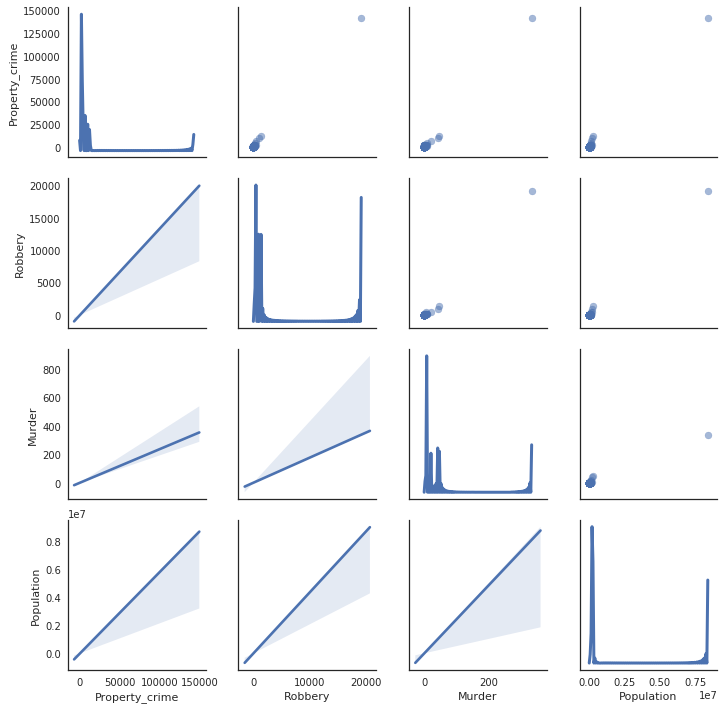

In [95]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Take a subset of the data to make plots clearer.
df_light = df[['Property_crime','Robbery', 'Murder', 'Population']]


df_light= df_light.dropna()

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_light.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.


                Property_crime   Robbery    Murder  Population
Property_crime        1.000000  0.998237  0.995403    0.996265
Robbery               0.998237  1.000000  0.993104    0.998469
Murder                0.995403  0.993104  1.000000    0.986758
Population            0.996265  0.998469  0.986758    1.000000


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


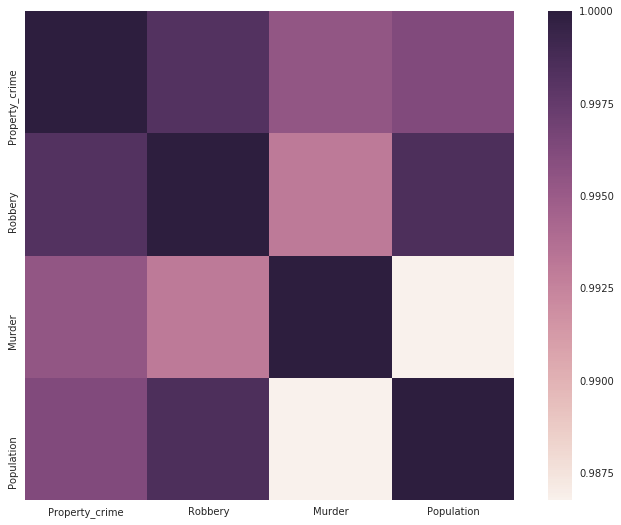

In [99]:
# Make the correlation matrix.
corrmat = df_light.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

In [136]:
# Remove extreme value (+-2sd)

mean_rob=df['Robbery'].mean()
std_rob=df['Robbery'].std()

df_light2 =df_light[df_light.Robbery<mean_rob+(1*std_rob)]



/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib64/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


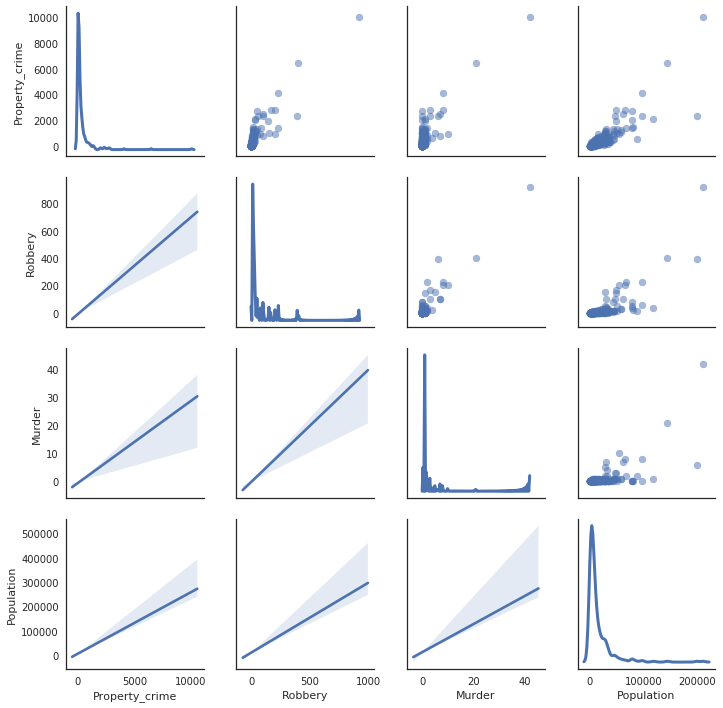

In [116]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")


df_light2= df_light2.dropna()

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_light2.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [137]:
# Remove extreme value (+-2sd)

mean_rob=df_light2['Robbery'].mean()
std_rob=df_light2['Robbery'].std()

mean_mur=df_light2['Murder'].mean()
std_mur=df_light2['Murder'].std()

mean_pop=df_light2['Population'].mean()
std_pop=df_light2['Population'].std()

df_light2['rob_adj'] =(df_light2['Robbery']-mean_rob)/std_rob
df_light2['mur_adj'] =(df_light2['Murder']-mean_mur)/std_mur
df_light2['pop_adj'] =(df_light2['Population']-mean_pop)/std_pop



/usr/lib/python3.4/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

                Property_crime   rob_adj   mur_adj   pop_adj
Property_crime        1.000000  0.893239  0.858485  0.857399
rob_adj               0.893239  1.000000  0.934849  0.777688
mur_adj               0.858485  0.934849  1.000000  0.666215
pop_adj               0.857399  0.777688  0.666215  1.000000


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


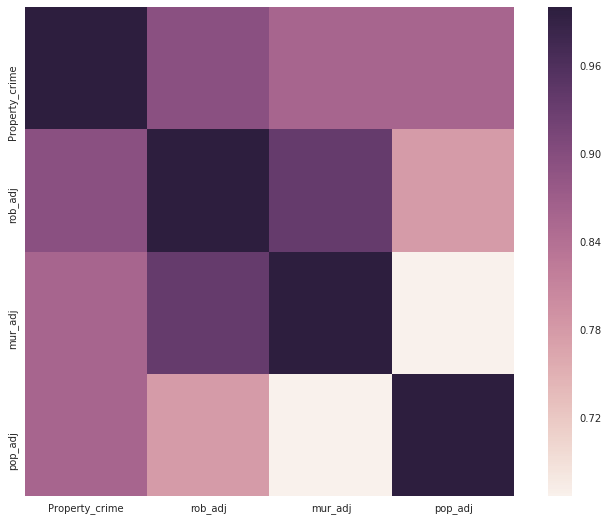

In [138]:
# Make the correlation matrix.
# Take a subset of the data to make plots clearer.
df_light3 = df_light2[['Property_crime','rob_adj', 'mur_adj', 'pop_adj']]
corrmat = df_light3.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

In [148]:
# CREATE MODEL

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


# Instantiate our model.
regr = linear_model.LinearRegression()
x=df_light3['Property_crime']
y1=df_light3['rob_adj']

# Fit our model to our data.
regr.fit(x, y1)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(x, y1, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()



/usr/lib64/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 346]